# Preprocessing, Classification and Clustering

On this notebook is developed the preprocessing and the application of classification and clustering algorithms to film reviews.

In [1]:
import numpy as np
import pandas as pd
import random
import re
import nltk
from tabulate import tabulate
from bs4 import BeautifulSoup as bs

In [2]:
def extract_lines(corpus):
    X = list()
    y = list()
    for i in range(2, 4381):
        try:
            fname = corpus + str(i) + '.xml'
            with open(fname, 'r', encoding = 'latin-1') as rfile:
                content = rfile.readlines()
                content = "".join(content)
                bs_content = bs(content, "lxml")
                review = bs_content.find("review")
                rank = review.get("rank")
                y.append(int(rank))
            
            fname = corpus + str(i) + '.review.pos'
            with open(fname, 'r', encoding = 'latin-1') as rfile:
                content = rfile.readlines()
                review_pos_aux = list()
                              
                for line in content:
                    if line != '\n':
                        line_ls = line.split()
                        review_pos_aux.append(line_ls[1])
                X.append(' '.join(review_pos_aux))
            
        except IOError:
            #print("Could not read file:", fname)
            pass
    
    return X, y

In [3]:
def tokenize_lines_by_words(lines):
    new_lines = list()
    for line in lines:
        new_line = line.lower()
        new_lines.append(nltk.word_tokenize(new_line))
    
    return new_lines

In [4]:
def clean_alphabetic_text_lines(lines):
    new_lines = list()
    for line in lines:
        new_line = list()
        for word in line:
            token = list()
            for c in word:
                #[a-záéíóúñü+$]
                if re.match(r'^[a-záéíóúñü+$]', c):
                    token.append(c)
            token = ''.join(token)
            if token != '':
                new_line.append(token)
        new_lines.append(new_line)
        
    return new_lines

In [5]:
def remove_stop_words(lines):
    stopwords = nltk.corpus.stopwords.words('spanish')
    clean_lines = list()
    for line in lines:
        clean_line = list()
        for word in line:
            if word not in stopwords:
                clean_line.append(word)
        clean_lines.append(' '.join(clean_line))
    
    return clean_lines

In [6]:
def get_X_y(lines):
    X = list()
    y = list()
    for line in lines:
        n = len(line)
        tag = line.pop(n - 1)
        corpus = line
        X.append(corpus)
        y.append(tag)
    return [X, y]

In [7]:
def transform_tag(y):
    new_y = list()
    for i in y:
        if i == 'spam':
            new_i = 1
        else:
            new_i = 0
        new_y.append(new_i)
    return np.array(new_y)

In [8]:
X, y = extract_lines('./../corpusCriticasCine/corpusCriticasCine/')

In [9]:
len(X)

3878

In [10]:
len(y)

3878

In [11]:
tokenized_X = tokenize_lines_by_words(X)

In [12]:
new_X = clean_alphabetic_text_lines(tokenized_X)

In [13]:
clean_X = remove_stop_words(new_X)

In [14]:
data = list(zip(clean_X, y))

In [15]:
random.shuffle(data)

In [16]:
clean_X, y = zip(*data)

In [17]:
clean_X

('manuale damore ser simpático original comedia romántico italiano amor hilo conductor trama actor desconocido llevar terreno decir película ser éxito italia fuerade tierra calcio ser normal secuela problema mismo ser perder frescura anterior vez haber actor conocer ademásde alguno anterior repetir perder credibilidad anterior frescura intentar rizar rizo vez tener ver amor excepto historia pareja gay resto llevar sexo manuale dsexo poder haber llamar cinta perfectamente comedia enredo plasmar película ser diferente parte amor desamor parte haber destacar bellisima sensual monicabellucci mito sexual español elsapataki mito sexual ambos expléndidas pantalla aunque decir palabra resto actor quedar expléndido carloverdone repetir entrega repetidor sergiorubini entrega ser mejor película fin secuela ser mismo ser mismo',
 'haber decir par vez blog ser rasgar vestidura afirmar categóricamente mal funcionar cine español extrañar si llegar pantalla ser siempre película malo mal rodar peor pla

In [18]:
y

(2,
 2,
 1,
 2,
 3,
 4,
 4,
 3,
 1,
 3,
 2,
 4,
 4,
 2,
 2,
 2,
 5,
 5,
 3,
 5,
 2,
 4,
 2,
 4,
 3,
 4,
 2,
 4,
 1,
 4,
 2,
 3,
 4,
 4,
 4,
 2,
 5,
 3,
 4,
 4,
 2,
 1,
 1,
 5,
 4,
 4,
 4,
 2,
 2,
 5,
 3,
 1,
 3,
 3,
 4,
 2,
 3,
 3,
 5,
 2,
 3,
 4,
 5,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 2,
 3,
 5,
 3,
 2,
 1,
 2,
 1,
 4,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 4,
 3,
 5,
 2,
 3,
 3,
 2,
 2,
 4,
 3,
 4,
 5,
 2,
 3,
 4,
 1,
 3,
 4,
 4,
 1,
 2,
 3,
 5,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 5,
 3,
 2,
 3,
 2,
 3,
 2,
 4,
 2,
 5,
 2,
 3,
 5,
 3,
 2,
 4,
 4,
 2,
 4,
 2,
 3,
 5,
 4,
 2,
 3,
 3,
 2,
 1,
 3,
 2,
 2,
 4,
 2,
 4,
 3,
 5,
 4,
 2,
 3,
 3,
 2,
 4,
 2,
 4,
 3,
 3,
 3,
 1,
 2,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 4,
 5,
 2,
 3,
 3,
 3,
 3,
 5,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 4,
 4,
 4,
 2,
 4,
 2,
 3,
 3,
 2,
 2,
 4,
 3,
 3,
 3,
 3,
 2,
 4,
 5,
 3,
 5,
 3,
 5,
 5,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 1,
 3,
 3,
 1,
 5,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 2,
 1,
 2,
 5,
 5,
 5,
 3,
 5,
 3,
 5,
 2,
 3,


In [19]:
set(y)

{1, 2, 3, 4, 5}

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
count_vect = CountVectorizer()

In [22]:
X_counts = count_vect.fit_transform(np.array(clean_X))

In [23]:
y = np.array(y)

In [24]:
X_counts.shape

(3878, 44980)

In [25]:
len(y)

3878

In [26]:
tfidf_transformer = TfidfTransformer()

In [27]:
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 14)

# Logistic Regression

In [29]:
classifier = LogisticRegression()

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression()

### Prediction of training data

In [31]:
y_pred = classifier.predict(X_train)

In [32]:
classifier.score(X_train, y_train)

0.8984526112185687

In [33]:
print(metrics.confusion_matrix(y_train, y_pred))

[[ 163   73   46    4    0]
 [   0  693   28    2    0]
 [   0    0 1003    2    0]
 [   0    3   53  657    0]
 [   0    5   63   36  271]]


In [34]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.57      0.73       286
           2       0.90      0.96      0.93       723
           3       0.84      1.00      0.91      1005
           4       0.94      0.92      0.93       713
           5       1.00      0.72      0.84       375

    accuracy                           0.90      3102
   macro avg       0.93      0.83      0.87      3102
weighted avg       0.91      0.90      0.89      3102



### Prediction of test data

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
classifier.score(X_test, y_test)

0.4497422680412371

In [37]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  6  37  20   2   0]
 [  0  91  97  12   0]
 [  0  23 192  33   0]
 [  0   9 110  54   4]
 [  0   5  33  42   6]]


In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.09      0.17        65
           2       0.55      0.46      0.50       200
           3       0.42      0.77      0.55       248
           4       0.38      0.31      0.34       177
           5       0.60      0.07      0.12        86

    accuracy                           0.45       776
   macro avg       0.59      0.34      0.34       776
weighted avg       0.51      0.45      0.41       776



# Multinomial NB

In [39]:
classifier = MultinomialNB()

In [40]:
classifier.fit(X_train, y_train)

MultinomialNB()

### Prediction of training data

In [41]:
y_pred = classifier.predict(X_train)

In [42]:
classifier.score(X_train, y_train)

0.32978723404255317

In [43]:
print(metrics.confusion_matrix(y_train, y_pred))

[[   1    0  285    0    0]
 [   0    9  714    0    0]
 [   0    0 1005    0    0]
 [   0    0  705    8    0]
 [   0    0  375    0    0]]


In [44]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       286
           2       1.00      0.01      0.02       723
           3       0.33      1.00      0.49      1005
           4       1.00      0.01      0.02       713
           5       0.00      0.00      0.00       375

    accuracy                           0.33      3102
   macro avg       0.67      0.21      0.11      3102
weighted avg       0.66      0.33      0.17      3102



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction of test data

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
classifier.score(X_test, y_test)

0.31958762886597936

In [47]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  0   0  65   0   0]
 [  0   0 200   0   0]
 [  0   0 248   0   0]
 [  0   0 177   0   0]
 [  0   0  86   0   0]]


In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00       200
           3       0.32      1.00      0.48       248
           4       0.00      0.00      0.00       177
           5       0.00      0.00      0.00        86

    accuracy                           0.32       776
   macro avg       0.06      0.20      0.10       776
weighted avg       0.10      0.32      0.15       776



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-means

In [49]:
classifier = KMeans(n_clusters = 5)

In [50]:
classifier.fit(X_train)

KMeans(n_clusters=5)

In [51]:
data = X_train
sse = dict()
res = list()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    res.append(kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

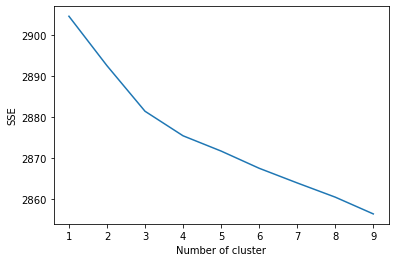

In [52]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Prediction of training data (5 clusters)

In [53]:
y_pred = classifier.predict(X_train)

In [54]:
ls_clusters = sorted(list(set(y_pred)))
dict_clusters = {key: np.sum(y_pred == key) / len(y_pred) for key in ls_clusters}
dict_clusters_sorted = dict(sorted(dict_clusters.items(), key=lambda item: item[1]))
dict_clusters_sorted_keys = list(dict_clusters_sorted.keys())

In [55]:
dict_clusters_sorted

{1: 0.05029013539651837,
 4: 0.08897485493230174,
 2: 0.1286266924564797,
 3: 0.33913604126370084,
 0: 0.3929722759509994}

In [56]:
ls_y = sorted(list(set(y_train)))
dict_y = {key: np.sum(y_train == key) / len(y_train) for key in ls_y}
dict_y_sorted = dict(sorted(dict_y.items(), key=lambda item: item[1]))
dict_y_sorted_keys = list(dict_y_sorted.keys())

In [57]:
dict_y_sorted

{1: 0.09219858156028368,
 5: 0.12088974854932302,
 4: 0.22985170857511283,
 2: 0.2330754352030948,
 3: 0.3239845261121857}

In [58]:
dict_map_clusters_y = {dict_clusters_sorted_keys[i]: dict_y_sorted_keys[i] for i in range(len(dict_y_sorted_keys))}

In [59]:
dict_map_clusters_y

{1: 1, 4: 5, 2: 4, 3: 2, 0: 3}

In [60]:
def reorder_labels(i):
    return dict_map_clusters_y[i]

In [61]:
# Adjustment to labels of data
y_pred_aux = np.array(list(map(reorder_labels, y_pred)))

In [62]:
classifier.score(X_train)

-2871.071019832852

In [63]:
print(metrics.confusion_matrix(y_train, y_pred_aux))

[[  8 116  76  48  38]
 [ 30 253 246 124  70]
 [ 44 326 417 131  87]
 [ 46 229 315  73  50]
 [ 28 128 165  23  31]]


In [64]:
print(metrics.classification_report(y_train, y_pred_aux))

              precision    recall  f1-score   support

           1       0.05      0.03      0.04       286
           2       0.24      0.35      0.29       723
           3       0.34      0.41      0.38      1005
           4       0.18      0.10      0.13       713
           5       0.11      0.08      0.10       375

    accuracy                           0.25      3102
   macro avg       0.19      0.20      0.18      3102
weighted avg       0.23      0.25      0.23      3102



### Prediction of test data (5 clusters)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
y_pred

array([3, 0, 3, 0, 3, 0, 0, 3, 2, 2, 3, 3, 3, 3, 0, 3, 1, 0, 0, 0, 0, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 1, 3, 0, 0, 4, 0, 0, 0, 3, 4, 3, 0, 3, 3,
       0, 3, 3, 4, 0, 4, 3, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3,
       3, 2, 2, 3, 4, 1, 3, 0, 2, 4, 0, 2, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 2, 3, 1, 2, 3, 3, 2, 1, 1, 0, 4, 4, 3, 0, 0, 3, 3,
       0, 0, 0, 3, 4, 0, 0, 2, 2, 3, 0, 0, 3, 2, 3, 3, 3, 2, 0, 0, 3, 0,
       0, 3, 3, 0, 0, 3, 0, 4, 1, 3, 3, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 3,
       4, 3, 3, 3, 0, 0, 0, 0, 3, 0, 2, 2, 0, 3, 3, 2, 0, 2, 4, 3, 3, 3,
       0, 0, 4, 0, 3, 0, 3, 3, 0, 4, 0, 3, 3, 0, 0, 0, 4, 3, 3, 3, 3, 0,
       0, 2, 0, 0, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3,
       0, 0, 3, 3, 1, 3, 4, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 3, 0, 0,
       1, 2, 0, 3, 0, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 2, 0, 0, 0, 0, 3, 0,
       4, 0, 3, 2, 3, 0, 3, 1, 0, 2, 0, 0, 0, 4, 0, 0, 1, 3, 0, 1, 4, 0,
       0, 0, 0, 2, 2, 0, 4, 3, 0, 3, 3, 1, 3, 0, 0,

In [67]:
# Adjustment to labels of data
y_pred_aux = np.array(list(map(reorder_labels, y_pred)))

In [68]:
classifier.score(X_test)

-719.0503512846051

In [69]:
print(metrics.confusion_matrix(y_test, y_pred_aux))

[[  2  27  20   8   8]
 [ 10  69  79  25  17]
 [ 13  75 111  26  23]
 [  6  66  86  10   9]
 [  4  23  49   1   9]]


In [70]:
print(metrics.classification_report(y_test, y_pred_aux))

              precision    recall  f1-score   support

           1       0.06      0.03      0.04        65
           2       0.27      0.34      0.30       200
           3       0.32      0.45      0.37       248
           4       0.14      0.06      0.08       177
           5       0.14      0.10      0.12        86

    accuracy                           0.26       776
   macro avg       0.18      0.20      0.18       776
weighted avg       0.22      0.26      0.23       776

